# Final Kaggle Competition - Image Classification
## Liz Parker, Colin Craighead, and Aren Dalloul

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras import layers
from keras import models
from keras import utils
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Preparing the Dataset

In [4]:
#Load the dataset
data = np.load('train_and_test.npz')

In [5]:
xTrain = data['X_train']
yTrain = data['y_train']
xTestFinal = data['X_test'] 
# Find out how many unique classifications in y_train
# This will be the number of nodes in the output layer
numClass = len(yTrain[0])
print(numClass)

43


In [6]:
#Split up the data set
xTrain, xTest, yTrain, yTest = train_test_split(xTrain, yTrain, test_size=0.25, random_state=42)

In [8]:
#Take a look at what kind of images we're classifying
plt.imshow(xTrain[1].astype('uint8'))
filename = 'test.png'
plt.savefig(filename)
plt.close()

## Building the Baseline Model

In [49]:
# Conv-Conv-Pool-Conv-Conv-Pool
# 32-32-64-64 filter size
# 3x3 filter size
# No Padding
# 2 maxpool layers

baselineModel = models.Sequential()
baselineModel.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(32, 32, 3)))
baselineModel.add(layers.BatchNormalization())
baselineModel.add(layers.Activation("relu"))
baselineModel.add(layers.Conv2D(32,(3,3),activation='relu'))
baselineModel.add(layers.BatchNormalization())
baselineModel.add(layers.Activation("relu"))
baselineModel.add(layers.MaxPooling2D((2, 2)))
baselineModel.add(layers.Conv2D(64,(3,3),activation='relu'))
baselineModel.add(layers.BatchNormalization())
baselineModel.add(layers.Activation("relu"))
baselineModel.add(layers.Conv2D(64,(3,3),activation='relu'))
baselineModel.add(layers.BatchNormalization())
baselineModel.add(layers.Activation("relu"))
baselineModel.add(layers.MaxPooling2D((2, 2)))
baselineModel.add(layers.Flatten())
baselineModel.add(layers.Dense(43, activation='softmax'))
baselineModel.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_98 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_101 (Activation)  (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_99 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
activation_102 (Activation)  (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 14, 14, 32)      

In [50]:
#Fit using 3 epochs
baselineModel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
baselineModel.fit(xTrain, yTrain, epochs=3, verbose=0)

In [51]:
loss, acc = baselineModel.evaluate(xTest, yTest, verbose = 0)
print('Baseline Model Accuracy:', acc)
print('Baseline Model Loss:', loss)

Baseline Model Accuracy: 0.9840865135192871
Baseline Model Loss: 0.05936306347479769


## Exploratory Analysis - Number of Filters
**Large-to-Small number of filters - a backwards approach**

In [9]:
LtoSmodel = models.Sequential()
LtoSmodel.add(layers.Conv2D(64,(3,3),activation='relu', input_shape=(32, 32, 3)))
LtoSmodel.add(layers.BatchNormalization())
LtoSmodel.add(layers.Activation("relu"))
LtoSmodel.add(layers.Conv2D(64,(3,3),activation='relu'))
LtoSmodel.add(layers.BatchNormalization())
LtoSmodel.add(layers.Activation("relu"))
LtoSmodel.add(layers.MaxPooling2D((2, 2)))
LtoSmodel.add(layers.Conv2D(32,(3,3),activation='relu'))
LtoSmodel.add(layers.BatchNormalization())
LtoSmodel.add(layers.Activation("relu"))
LtoSmodel.add(layers.Conv2D(32,(3,3),activation='relu'))
LtoSmodel.add(layers.BatchNormalization())
LtoSmodel.add(layers.Activation("relu"))
LtoSmodel.add(layers.MaxPooling2D((2, 2)))
LtoSmodel.add(layers.Flatten())
LtoSmodel.add(layers.Dense(43, activation='softmax'))

LtoSmodel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
LtoSmodel.fit(xTrain, yTrain, epochs=3, verbose = 0)

loss, acc = LtoSmodel.evaluate(xTest, yTest, verbose = 0)
print('Large-to-Small Filters Accuracy:', acc)
print('Large-to-Small Filters Loss:', loss)

Large-to-Small Filters Accuracy: 0.9810262322425842
Large-to-Small Filters Loss: 0.0785047400960423


#### Test Data Results (Number of Filters)
The Small-to-Large forwards approach scored better performance

| | Small-to-Large (Baseline Model) | Large-to-Small |
|---|---|---|
| Accuracy | 0.986 | 0.981 |
| Cross Entropy | 0.0527 | 0.0785 |

**Test and Visualization of Optimal Number of Filters**

In [10]:
def CreateModel_VarLayers(num_filters=[2,4]):
    Cmodel = models.Sequential()
    Cmodel.add(layers.Conv2D(num_filters[0],(3,3),activation='relu', input_shape=(32, 32, 3)))
    Cmodel.add(layers.BatchNormalization())
    Cmodel.add(layers.Activation("relu"))
    Cmodel.add(layers.Conv2D(num_filters[0],(3,3),activation='relu'))
    Cmodel.add(layers.BatchNormalization())
    Cmodel.add(layers.Activation("relu"))
    Cmodel.add(layers.MaxPooling2D((2, 2)))
    Cmodel.add(layers.Conv2D(num_filters[1],(3,3),activation='relu'))
    Cmodel.add(layers.BatchNormalization())
    Cmodel.add(layers.Activation("relu"))
    Cmodel.add(layers.Conv2D(num_filters[1],(3,3),activation='relu'))
    Cmodel.add(layers.BatchNormalization())
    Cmodel.add(layers.Activation("relu"))
    Cmodel.add(layers.MaxPooling2D((2, 2)))
    Cmodel.add(layers.Flatten())
    Cmodel.add(layers.Dense(43, activation='softmax'))
    Cmodel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
    Cmodel.fit(xTrain, yTrain, epochs=3, verbose = 0)
    loss, acc = Cmodel.evaluate(xTest, yTest, verbose = 0)
    return loss, acc

In [11]:
Test_Layers_Sizes_arr = [[2,4],[4,8],[8,16],[16,32],[32,64],[64,128],[128,256]]
loss_r_arr = []
acc_r_arr = []
for ls in Test_Layers_Sizes_arr:
    loss_r, acc_r = CreateModel_VarLayers(ls)
    loss_r_arr.append(loss_r)
    acc_r_arr.append(acc_r)

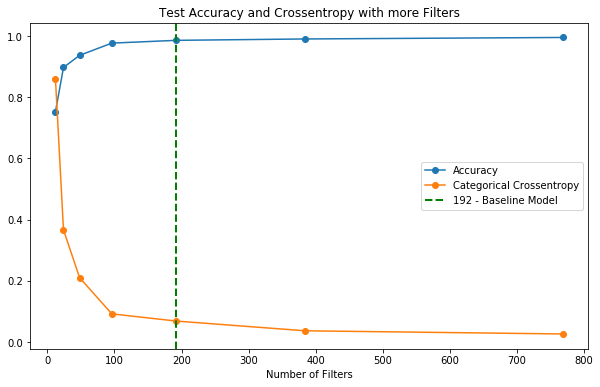

In [69]:
x = []
for ls in Test_Layers_Sizes_arr:
    x.append(sum(ls)*2)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.plot(x,acc_r_arr,'o-',label='Accuracy')
ax.plot(x,loss_r_arr,'o-',label='Categorical Crossentropy')
ax.set_title("Test Accuracy and Crossentropy with more Filters")
ax.set_xlabel("Number of Filters")
ax.axvline(x = 192, linewidth=2, color='g', ls = "--", label = "192 - Baseline Model")
ax.legend()

## Exploratory Analysis - Filter Size
**Compare Small-to-Large, Large-to-Small, and Constant Filter Size**

In [13]:
StoLmodel = models.Sequential()
StoLmodel.add(layers.Conv2D(32,(1,1),activation='relu', input_shape=(32, 32, 3)))
StoLmodel.add(layers.BatchNormalization())
StoLmodel.add(layers.Activation("relu"))
StoLmodel.add(layers.Conv2D(32,(3,3),activation='relu'))
StoLmodel.add(layers.BatchNormalization())
StoLmodel.add(layers.Activation("relu"))
StoLmodel.add(layers.MaxPooling2D((2, 2)))
StoLmodel.add(layers.Conv2D(64,(5,5),activation='relu'))
StoLmodel.add(layers.BatchNormalization())
StoLmodel.add(layers.Activation("relu"))
StoLmodel.add(layers.Conv2D(64,(7,7),activation='relu'))
StoLmodel.add(layers.BatchNormalization())
StoLmodel.add(layers.Activation("relu"))
StoLmodel.add(layers.MaxPooling2D((2, 2)))
StoLmodel.add(layers.Flatten())
StoLmodel.add(layers.Dense(43, activation='softmax'))
StoLmodel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
StoLmodel.fit(xTrain, yTrain, epochs=3, verbose = 0)
loss, acc = StoLmodel.evaluate(xTest, yTest, verbose = 0)
print('Small to Large Accuracy:', acc)
print('Small to Large Loss:', loss)

Small to Large Accuracy: 0.9752116799354553
Small to Large Loss: 0.0943693617042631


In [14]:
LtoSModel = models.Sequential()
LtoSModel.add(layers.Conv2D(32,(7,7),activation='relu', input_shape=(32, 32, 3)))
LtoSModel.add(layers.BatchNormalization())
LtoSModel.add(layers.Activation("relu"))
LtoSModel.add(layers.Conv2D(32,(5,5),activation='relu'))
LtoSModel.add(layers.BatchNormalization())
LtoSModel.add(layers.Activation("relu"))
LtoSModel.add(layers.MaxPooling2D((2, 2)))
LtoSModel.add(layers.Conv2D(64,(3,3),activation='relu'))
LtoSModel.add(layers.BatchNormalization())
LtoSModel.add(layers.Activation("relu"))
LtoSModel.add(layers.Conv2D(64,(1,1),activation='relu'))
LtoSModel.add(layers.BatchNormalization())
LtoSModel.add(layers.Activation("relu"))
LtoSModel.add(layers.MaxPooling2D((2, 2)))
LtoSModel.add(layers.Flatten())
LtoSModel.add(layers.Dense(43, activation='softmax'))
LtoSModel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
LtoSModel.fit(xTrain, yTrain, epochs=3, verbose = 0)
loss, acc = LtoSModel.evaluate(xTest, yTest, verbose = 0)
print('Large to Small Accuracy:', acc)
print('Large to Small Loss:', loss)

Large to Small Accuracy: 0.9774558544158936
Large to Small Loss: 0.09735409069780117


#### Test Data Results (Filter Size)
Using a constant filter size scored the best performance

| | Constant (Baseline Model) | Small-to-Large | Large-to-Small |
|---|---|---|---|
| Accuracy | 0.986 | 0.975 | 0.977 |
| Cross Entropy | 0.0527 | 0.0943 | 0.0973 |

**Test and Visualization of Optimal Number of Constant Size Filters**

In [15]:
def CreateModel_VarFilterSize(fSize):
    Cmodel = models.Sequential()
    Cmodel.add(layers.Conv2D(32,(fSize,fSize),activation='relu', input_shape=(32, 32, 3)))
    Cmodel.add(layers.BatchNormalization())
    Cmodel.add(layers.Activation("relu"))
    Cmodel.add(layers.Conv2D(32,(fSize,fSize),activation='relu'))
    Cmodel.add(layers.BatchNormalization())
    Cmodel.add(layers.Activation("relu"))
    Cmodel.add(layers.MaxPooling2D((2, 2)))
    Cmodel.add(layers.Conv2D(64,(fSize,fSize),activation='relu'))
    Cmodel.add(layers.BatchNormalization())
    Cmodel.add(layers.Activation("relu"))
    Cmodel.add(layers.Conv2D(64,(fSize,fSize),activation='relu'))
    Cmodel.add(layers.BatchNormalization())
    Cmodel.add(layers.Activation("relu"))
    Cmodel.add(layers.MaxPooling2D((2, 2)))
    Cmodel.add(layers.Flatten())
    Cmodel.add(layers.Dense(43, activation='softmax'))
    Cmodel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
    Cmodel.fit(xTrain, yTrain, epochs=3, verbose = 0)
    loss, acc = Cmodel.evaluate(xTest, yTest, verbose = 0)
    return loss, acc

In [66]:
FilterSizes = [1,3,5]
Loss = []
Accs = []
for sz in FilterSizes:
    tmpL, tmpA = CreateModel_VarFilterSize(sz)
    Loss.append(tmpL)
    Accs.append(tmpA)

[0.7968989014625549, 0.9884729385375977, 0.9884729385375977]


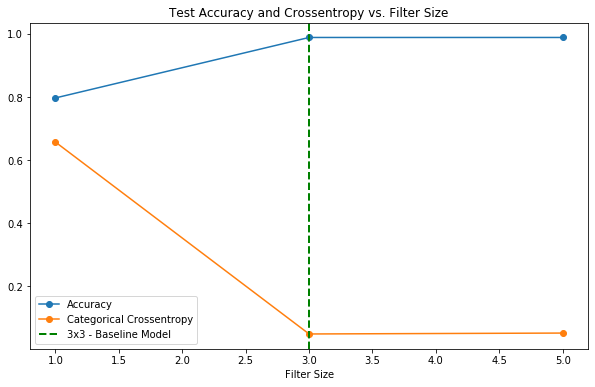

In [70]:
print(Accs)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()
ax.plot(FilterSizes,Accs,'o-',label='Accuracy')
ax.plot(FilterSizes,Loss,'o-',label='Categorical Crossentropy')
ax.set_title("Test Accuracy and Crossentropy vs. Filter Size")
ax.set_xlabel("Filter Size")
ax.axvline(x = 3, linewidth=2, color='g', ls = "--", label = "3x3 - Baseline Model")
ax.legend()

## Exploratory Analysis - Normalization Method
**Exploring the effect of more/less batch normalization layers**

In [18]:
def model_with_max_normalization(numEpochs=10):
    maxNormModel = models.Sequential()
    maxNormModel.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(32, 32, 3)))
    maxNormModel.add(layers.BatchNormalization())
    maxNormModel.add(layers.Activation("relu"))
    maxNormModel.add(layers.Conv2D(32,(3,3),activation='relu'))
    maxNormModel.add(layers.BatchNormalization())
    maxNormModel.add(layers.Activation("relu"))
    maxNormModel.add(layers.MaxPooling2D((2, 2)))
    maxNormModel.add(layers.Conv2D(64,(3,3),activation='relu'))
    maxNormModel.add(layers.BatchNormalization())
    maxNormModel.add(layers.Activation("relu"))
    maxNormModel.add(layers.Conv2D(64,(3,3),activation='relu'))
    maxNormModel.add(layers.BatchNormalization())
    maxNormModel.add(layers.Activation("relu"))
    maxNormModel.add(layers.MaxPooling2D((2, 2)))
    maxNormModel.add(layers.Flatten())
    maxNormModel.add(layers.Dense(43, activation='softmax'))
    maxNormModel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
    maxNormModel.fit(xTrain, yTrain, epochs=numEpochs, verbose = 0)
    loss, acc = baselineModel.evaluate(xTest, yTest, verbose = 0)
    return loss, acc

In [19]:
def model_with_min_normalization(numEpochs=10):
    nModel = models.Sequential()
    nModel.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(32, 32, 3)))
    nModel.add(layers.Activation("relu"))
    nModel.add(layers.BatchNormalization())
    nModel.add(layers.Conv2D(32,(3,3),activation='relu'))
    nModel.add(layers.Activation("relu"))
    nModel.add(layers.MaxPooling2D((2, 2)))
    nModel.add(layers.Conv2D(32,(3,3),activation='relu'))
    nModel.add(layers.Activation("relu"))
    nModel.add(layers.Conv2D(32,(3,3),activation='relu'))
    nModel.add(layers.Activation("relu"))
    nModel.add(layers.MaxPooling2D((2, 2)))
    nModel.add(layers.Flatten())
    nModel.add(layers.Dense(43, activation='softmax'))
    nModel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
    nModel.fit(xTrain, yTrain, epochs=numEpochs, verbose = 0)
    loss, acc = nModel.evaluate(xTest, yTest, verbose = 0)
    return loss, acc

In [20]:
normLoss, normAcc = model_with_max_normalization()
print('Accuracy (w/ Max Normalization): {}'.format(normAcc))
print('Loss (w/ Max Normalization): {}'.format(normLoss))

Accuracy (w/ Max Normalization): 0.9868407845497131
Loss (w/ Max Normalization): 0.052770754770637716


In [21]:
wo_norm_Loss, wo_norm_Acc = model_with_min_normalization()
print('Accuracy (w/ Min Normalization): {}'.format(wo_norm_Acc))
print('Loss (w/ Min Normalization): {}'.format(wo_norm_Loss))

Accuracy (w/ Min Normalization): 0.9895949959754944
Loss (w/ Min Normalization): 0.048613815284289694


#### Test Data Results (with maximun and minimum normalization)
The results show that there was statistically negligible difference in performance between the model using 4 normalization layers and the model using only 1

| | With Max Normalization | With Min Normalization |
|---|---|---|
| Accuracy | 0.986 | 0.989 |
| Cross Entropy | 0.0527 | 0.0486 |

**Exploring the effect of a dropout layer on the model**

In [22]:
def model_without_dropout(numEpochs=3, v=0):
    noDropoutModel = models.Sequential()
    noDropoutModel.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(32, 32, 3)))
    noDropoutModel.add(layers.BatchNormalization())
    noDropoutModel.add(layers.Activation("relu"))
    noDropoutModel.add(layers.Conv2D(32,(3,3),activation='relu'))
    noDropoutModel.add(layers.BatchNormalization())
    noDropoutModel.add(layers.Activation("relu"))
    noDropoutModel.add(layers.MaxPooling2D((2, 2)))
    noDropoutModel.add(layers.Conv2D(64,(3,3),activation='relu'))
    noDropoutModel.add(layers.BatchNormalization())
    noDropoutModel.add(layers.Activation("relu"))
    noDropoutModel.add(layers.Conv2D(64,(3,3),activation='relu'))
    noDropoutModel.add(layers.BatchNormalization())
    noDropoutModel.add(layers.Activation("relu"))
    noDropoutModel.add(layers.MaxPooling2D((2, 2)))
    noDropoutModel.add(layers.Flatten())
    noDropoutModel.add(layers.Dense(43, activation='softmax'))
    noDropoutModel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
    noDropoutModel.fit(xTrain, yTrain, epochs=numEpochs, verbose=v)
    loss, acc = noDropoutModel.evaluate(xTest, yTest, verbose = 0)
    return loss, acc

In [23]:
def model_with_dropout(dropoutRate=0.2, numEpochs=3, v=0):
    nModel = models.Sequential()
    nModel.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(32, 32, 3)))
    nModel.add(layers.BatchNormalization())
    nModel.add(layers.Activation("relu"))
    nModel.add(layers.Dropout(dropoutRate))
    
    nModel.add(layers.Conv2D(32,(3,3),activation='relu'))
    nModel.add(layers.BatchNormalization())
    nModel.add(layers.Activation("relu"))
    nModel.add(layers.Dropout(dropoutRate))
    nModel.add(layers.MaxPooling2D((2, 2)))
    nModel.add(layers.Conv2D(32,(3,3),activation='relu'))
    nModel.add(layers.BatchNormalization())
    nModel.add(layers.Activation("relu"))
    nModel.add(layers.Dropout(dropoutRate))
    
    nModel.add(layers.Conv2D(32,(3,3),activation='relu'))
    nModel.add(layers.BatchNormalization())
    nModel.add(layers.Activation("relu"))
    nModel.add(layers.MaxPooling2D((2, 2)))
    nModel.add(layers.Flatten())
    nModel.add(layers.Dense(43, activation='softmax'))
    nModel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
    nModel.fit(xTrain, yTrain, epochs=numEpochs, verbose=v)
    loss, acc = nModel.evaluate(xTest, yTest, verbose = 0)
    return loss, acc

In [24]:
dropLoss, dropAcc = model_with_dropout(numEpochs=10, v=1)
print('Accuracy (w/ Dropout): {}'.format(dropAcc))
print('Loss (w/ Dropout): {}'.format(dropLoss))

Epoch 1/10
29406/29406 [==============================] - 112s 4ms/step - loss: 1.5558 - categorical_accuracy: 0.5791
Epoch 2/10
29406/29406 [==============================] - 114s 4ms/step - loss: 0.3756 - categorical_accuracy: 0.8909
Epoch 3/10
29406/29406 [==============================] - 112s 4ms/step - loss: 0.1840 - categorical_accuracy: 0.9490
Epoch 4/10
29406/29406 [==============================] - 111s 4ms/step - loss: 0.1179 - categorical_accuracy: 0.9679
Epoch 5/10
29406/29406 [==============================] - 115s 4ms/step - loss: 0.0882 - categorical_accuracy: 0.9765
Epoch 6/10
29406/29406 [==============================] - 111s 4ms/step - loss: 0.0706 - categorical_accuracy: 0.9807
Epoch 7/10
29406/29406 [==============================] - 111s 4ms/step - loss: 0.0574 - categorical_accuracy: 0.9840
Epoch 8/10
29406/29406 [==============================] - 111s 4ms/step - loss: 0.0464 - categorical_accuracy: 0.9886
Epoch 9/10
29406/29406 [==============================] 

In [25]:
noDropLoss, noDropAcc = model_without_dropout(numEpochs=10, v=1)
print('Accuracy (No Dropout): {}'.format(noDropAcc))
print('Loss (No Dropout): {}'.format(noDropLoss))

Epoch 1/10
29406/29406 [==============================] - 157s 5ms/step - loss: 0.8117 - categorical_accuracy: 0.7967
Epoch 2/10
29406/29406 [==============================] - 138s 5ms/step - loss: 0.0835 - categorical_accuracy: 0.9812
Epoch 3/10
29406/29406 [==============================] - 137s 5ms/step - loss: 0.0335 - categorical_accuracy: 0.9935
Epoch 4/10
29406/29406 [==============================] - 143s 5ms/step - loss: 0.0177 - categorical_accuracy: 0.9972
Epoch 5/10
29406/29406 [==============================] - 150s 5ms/step - loss: 0.0088 - categorical_accuracy: 0.9994
Epoch 6/10
29406/29406 [==============================] - 140s 5ms/step - loss: 0.0064 - categorical_accuracy: 0.9996
Epoch 7/10
29406/29406 [==============================] - 138s 5ms/step - loss: 0.0043 - categorical_accuracy: 0.9998
Epoch 8/10
29406/29406 [==============================] - 136s 5ms/step - loss: 0.0036 - categorical_accuracy: 0.9999
Epoch 9/10
29406/29406 [==============================] 

#### Results (with and without dropout, epochs = 10)
Again, the results show a negligible difference between using or not using a dropout layer. In looking at the verbose training at each epoch, it is interesting to note how much more quickly the accuracy increases in the model without dropout compared to the model with dropout. This is to be expected since the dropout layer is attempting to reduce overfitting of the model.

| | With Dropout | Without Dropout |
|---|---|---|
| Accuracy | 0.994 | 0.993 |
| Cross Entropy | 0.0345| 0.024 |

In [73]:
dropoutRates = [0.05, 0.2,0.4,0.5]
Loss = []
Accs = []
for i in dropoutRates:
    tmpL, tmpA = model_with_dropout(i, numEpochs=5, v=0)
    Loss.append(tmpL)
    Accs.append(tmpA)

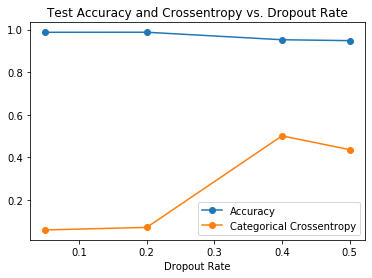

In [74]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(dropoutRates,Accs,'o-',label='Accuracy')
ax.plot(dropoutRates,Loss,'o-',label='Categorical Crossentropy')
ax.set_title("Test Accuracy and Crossentropy vs. Dropout Rate")
ax.set_xlabel("Dropout Rate")
ax.legend()

Lower dropout rates show better model performance 

## Final Model

All our tests supported the architecture of the baseline model. The normalization and dropout tests that used more epochs when fitting had better performance, so we decided to use 10 epochs to train the final model. 

In [57]:
finalModel = models.Sequential()
finalModel.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(32, 32, 3)))
finalModel.add(layers.BatchNormalization())
finalModel.add(layers.Activation("relu"))
finalModel.add(layers.Conv2D(32,(3,3),activation='relu'))
finalModel.add(layers.BatchNormalization())
finalModel.add(layers.Activation("relu"))
finalModel.add(layers.MaxPooling2D((2, 2)))
finalModel.add(layers.Conv2D(64,(3,3),activation='relu'))
finalModel.add(layers.BatchNormalization())
finalModel.add(layers.Activation("relu"))
finalModel.add(layers.Conv2D(64,(3,3),activation='relu'))
finalModel.add(layers.BatchNormalization())
finalModel.add(layers.Activation("relu"))
finalModel.add(layers.MaxPooling2D((2, 2)))
finalModel.add(layers.Flatten())
finalModel.add(layers.Dense(43, activation='softmax'))
finalModel.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['categorical_accuracy'])
finalModel.fit(xTrain, yTrain, epochs=10, verbose=0)
loss, acc = finalModel.evaluate(xTest, yTest, verbose = 0)
print('Final Model Accuracy:', acc)
print('Final Model Loss:', loss)

Final Model Accuracy: 0.9933694005012512
Final Model Loss: 0.027011518850269672


## Output Predictions to .csv File for Kaggle Submission

In [53]:
yPred = finalModel.predict(xTestFinal)

In [54]:
# Output to data file
yOutput = []
for i in range(len(yPred)):
    zro = [0] * numClass
    yOutput.append(zro)
xOutput= [0] * len(yPred)
for i in range(len(yPred)):
    theIndex = np.where(yPred[i] == np.amax(yPred[i]))[0][0]
    yOutput[i][theIndex] = 1 
    xOutput[i] = i

In [55]:
predDF = pd.DataFrame({'id':xOutput})
for i in range(len(yOutput[0])):
    label = 'oh_' + str(i)
    newCol = []
    for dp in yOutput:
        newCol.append(dp[i])
    predDF[label] = pd.Series(newCol, index=predDF.index)

In [56]:
predDF.to_csv("test_output.csv",index=False)